<img src="HResources.png">

# 1. Entendendo o problema de negócio

É sabido que a rotatividade de pessoal é uma das principais preocupações das empresas hoje. O processo de recrutamento representa uma despesa considerável, e para se substituir um funcionário leva-se tempo, não apenas para se encontrar um novo profissional, mas também para treiná-lo, e para que ele consiga chegar no mesmo nível de performance do colaborador anterior. Mas e se as empresas conseguirem identificar, antes de efetivar a contratação, quais candidatos estão mais propensos a trocá-las por uma nova organização? Nesse projeto o objetivo é exatamente esse. 

Utilizando de dados históricos de funcionários que deixaram e permaneceram na empresa, vamos identificar, usando modelos de Machine Learning, quais candidatos estão mais propensos a se desligarem, para que o gestor de área possa atuar diretamente, seja melhorando seu salário, benefícios ou apresentando uma proposta de crescimento vertical na carreira.

A ilustração de capa é de Ilona RybakIlona Rybak.

# 2. Importando as bibliotecas e o dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score, confusion_matrix

import tensorflow as tf
import pickle

sns.set()

%matplotlib inline





In [2]:
employee_df = pd.read_csv(r"C:\Users\herna\OneDrive\Ciência de Dados para Negócios\RH\Employee.csv")

In [3]:
employee_df.shape

(1470, 35)

In [4]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 3. Análise exploratória dos dados

In [7]:
# convertendo dados categóricos "yes" e "no" em dados numéricos
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x =='Yes' else 0)

In [8]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# convertendo dados categóricos "yes" e "no" em dados numéricos
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x =='Yes' else 0)

In [10]:
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x =='Y' else 0)

#### Verificando valores faltantes com heatmap

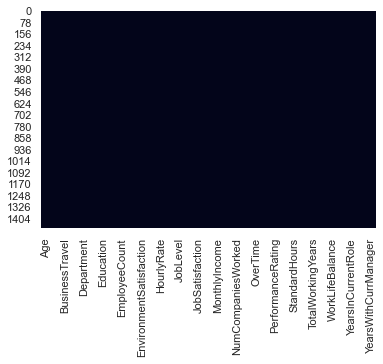

In [11]:
sns.heatmap(employee_df.isnull(), cbar=False);

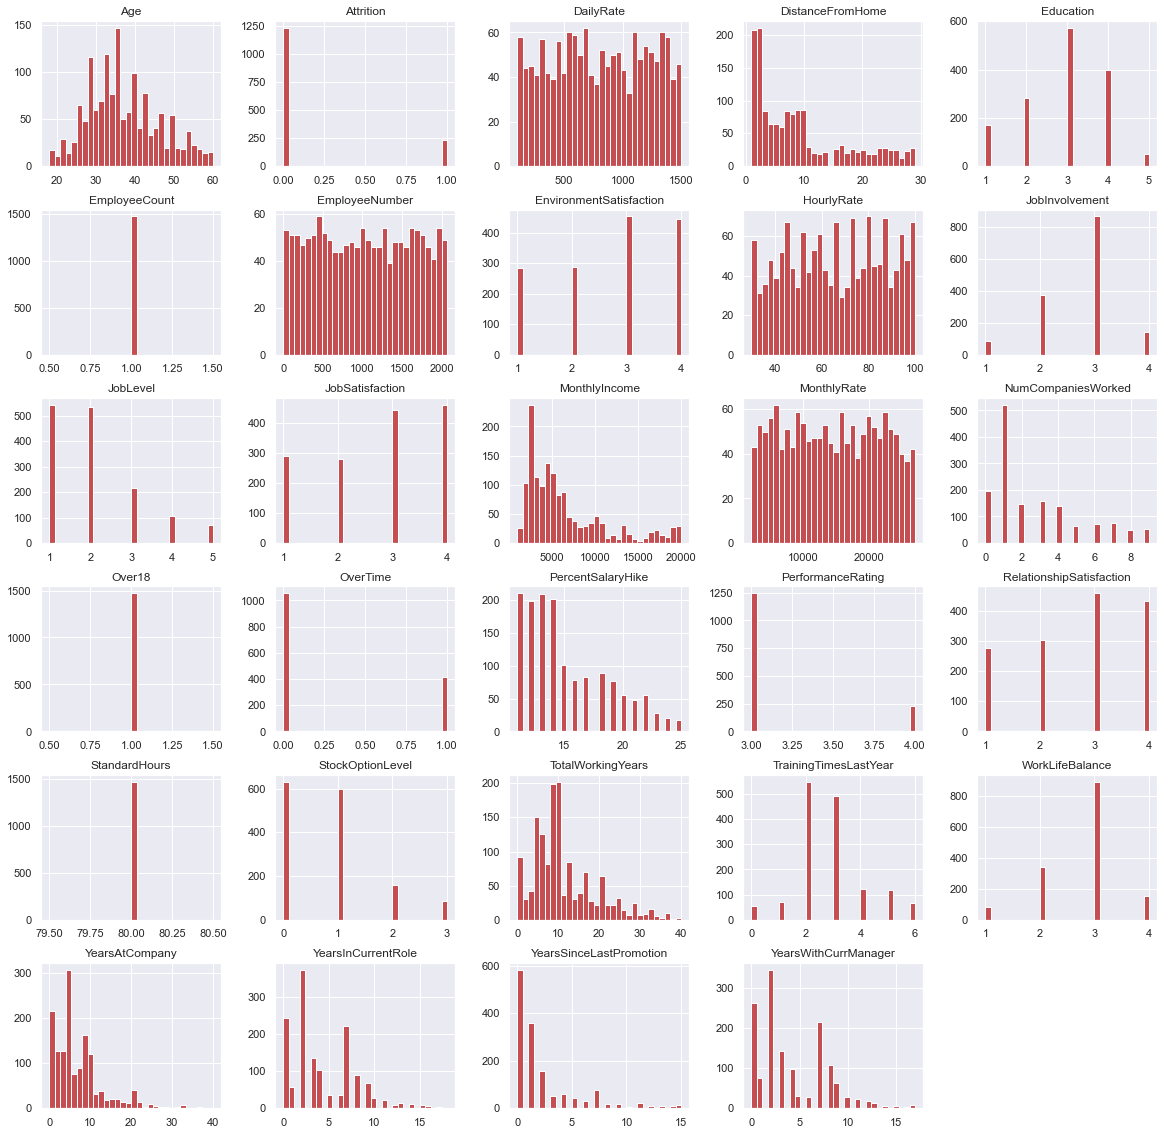

In [12]:
employee_df.hist(bins=30, figsize=(20,20), color = 'r');

#### Apagando atributos não relevantes para o projeto

In [13]:
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1,inplace=True)

In [14]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Separando os funcionários que saíram da empresa

In [15]:
left_df = employee_df[employee_df['Attrition']==1]
stayed_df = employee_df[employee_df['Attrition']==0]

In [16]:
print('Total: ', len(employee_df))
print('Número de funcionários que saíram da empresa= ', len(left_df))
print('Porcentagem de funcionários que saíram da empresa= ', (len(left_df) / len(employee_df))*100)
print('Número de funcionários que ficaram na empresa= ', len(stayed_df))
print('Porcentagem de funcionários que ficaram na empresa= ', (len(stayed_df) / len(employee_df))*100)

Total:  1470
Número de funcionários que saíram da empresa=  237
Porcentagem de funcionários que saíram da empresa=  16.122448979591837
Número de funcionários que ficaram na empresa=  1233
Porcentagem de funcionários que ficaram na empresa=  83.87755102040816


In [17]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [18]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

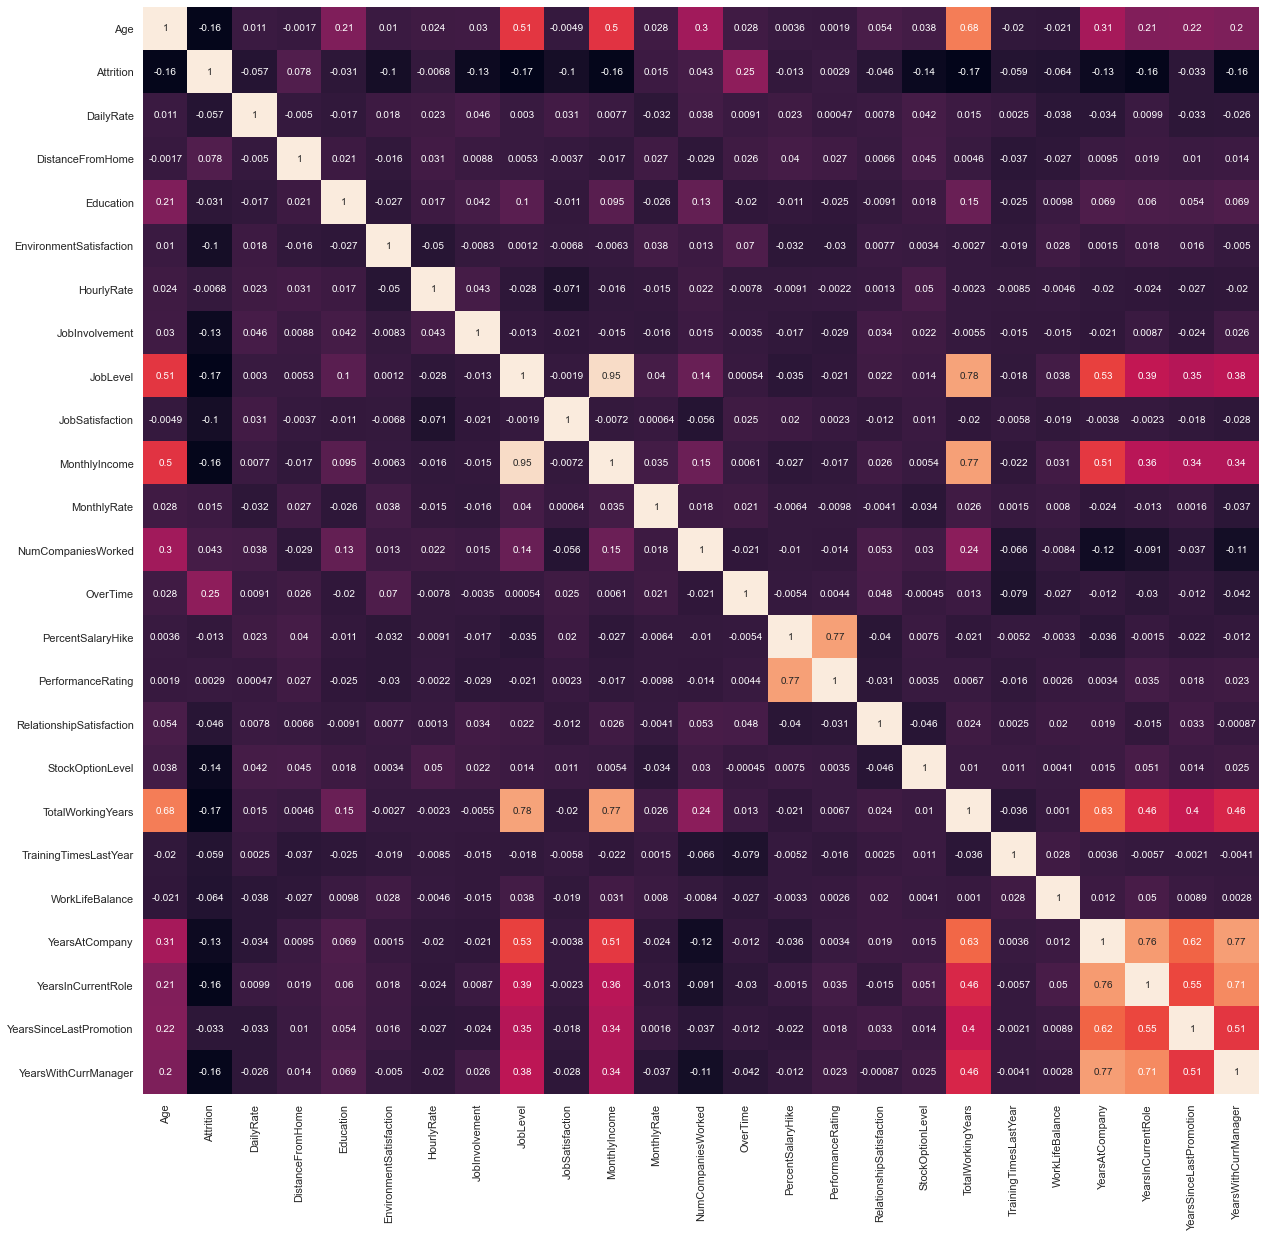

In [19]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, cbar=False)

<AxesSubplot:xlabel='Age', ylabel='count'>

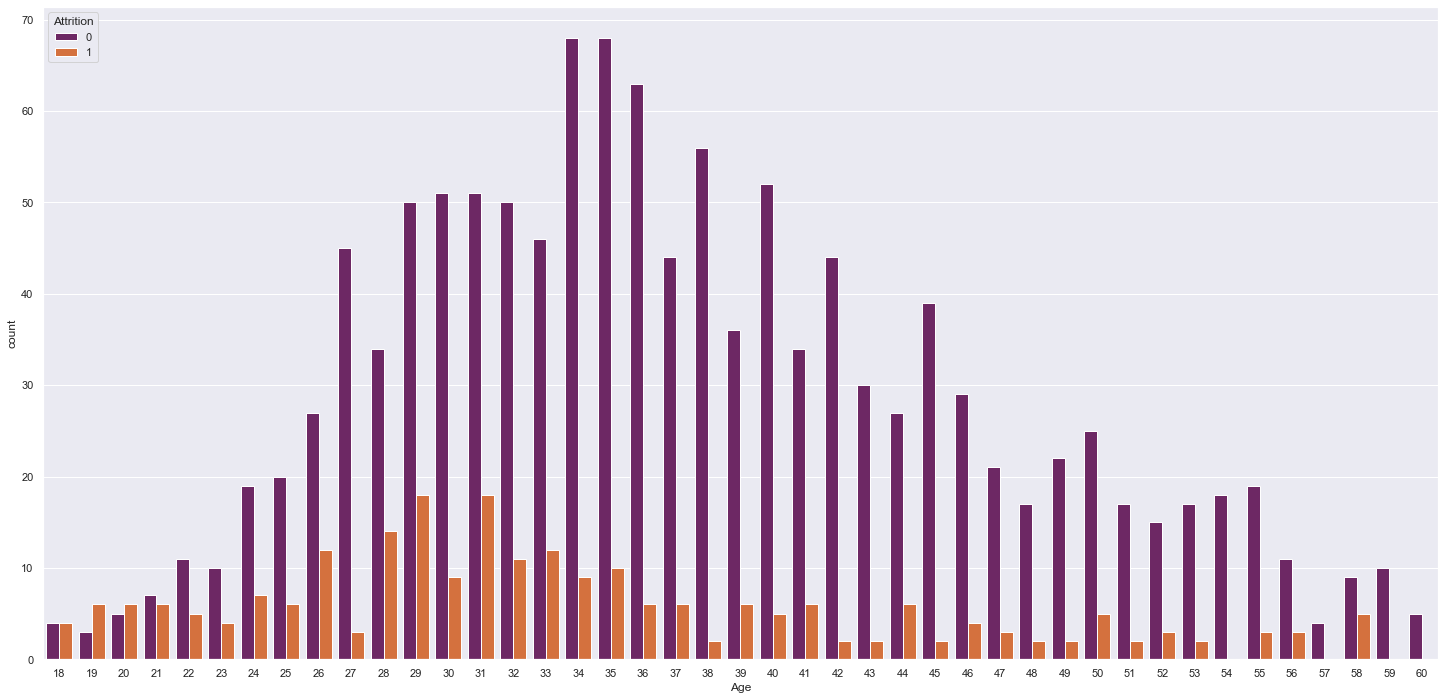

In [20]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', palette='inferno', data=employee_df)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

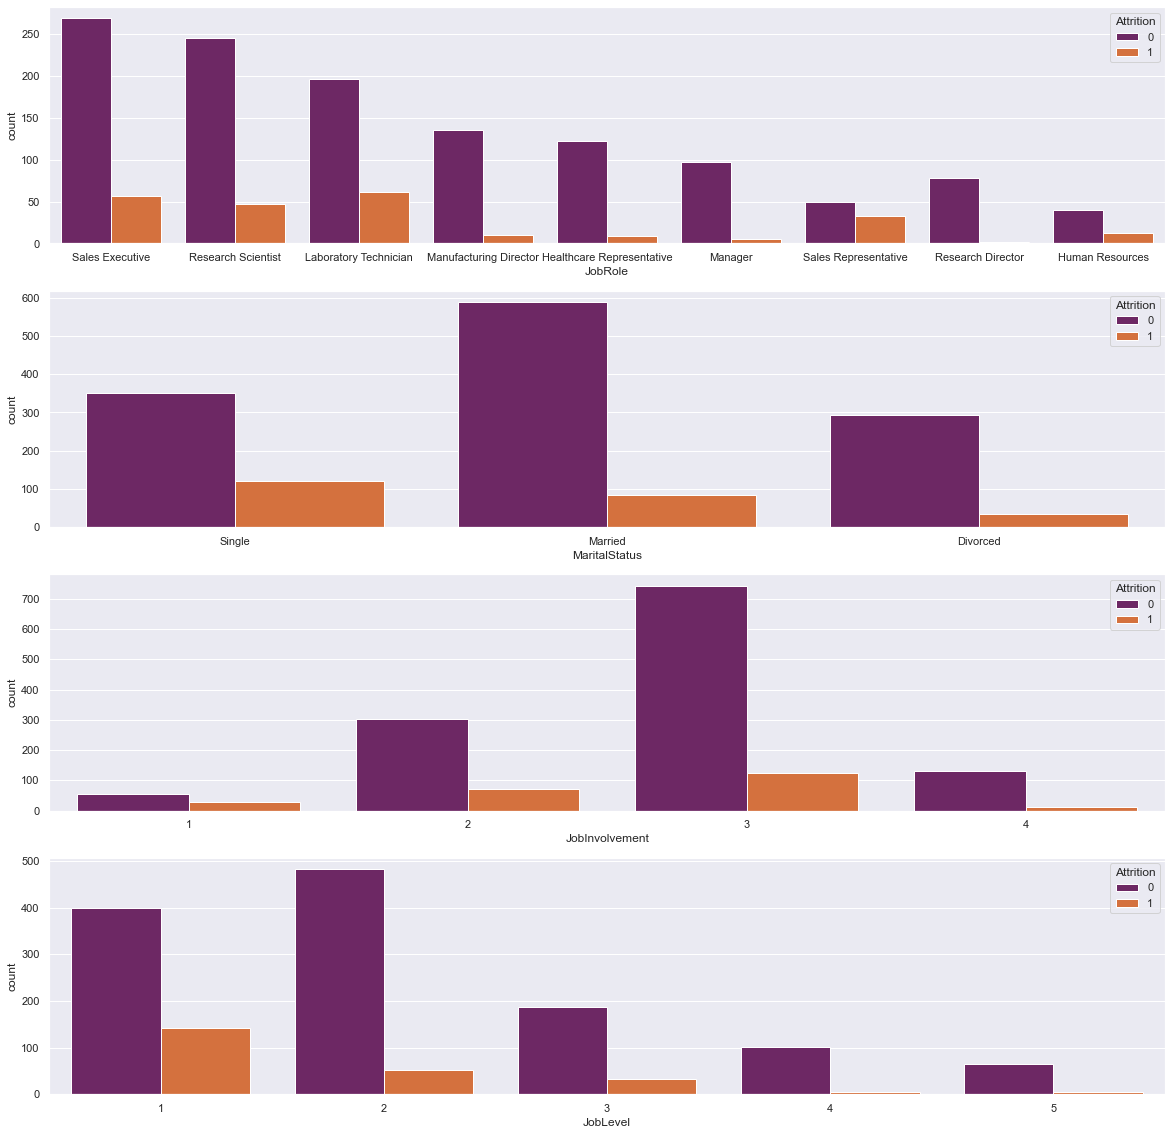

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition',palette='inferno', data=employee_df)
plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', palette='inferno',data=employee_df)
plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', palette='inferno',data=employee_df)
plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', palette='inferno',data=employee_df)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

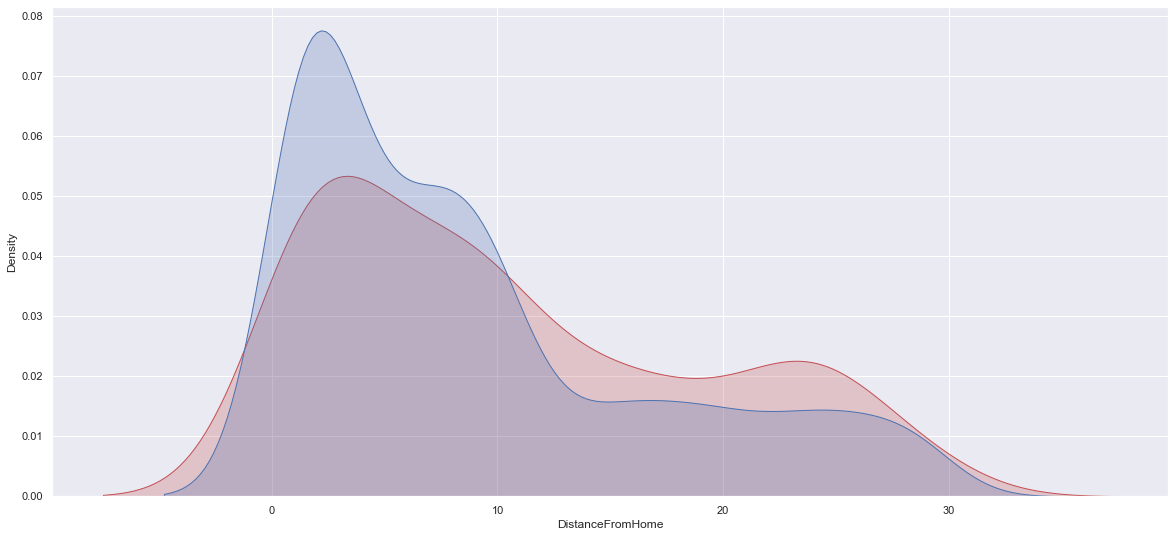

In [22]:
# KDE (KERNEL DENSITY ESTIMATE)
plt.figure(figsize=(20,9))
sns.kdeplot(left_df['DistanceFromHome'], label='Funcionários que saíram da empresa', shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Funcionários que ficaram na empresa', shade=True, color='b')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

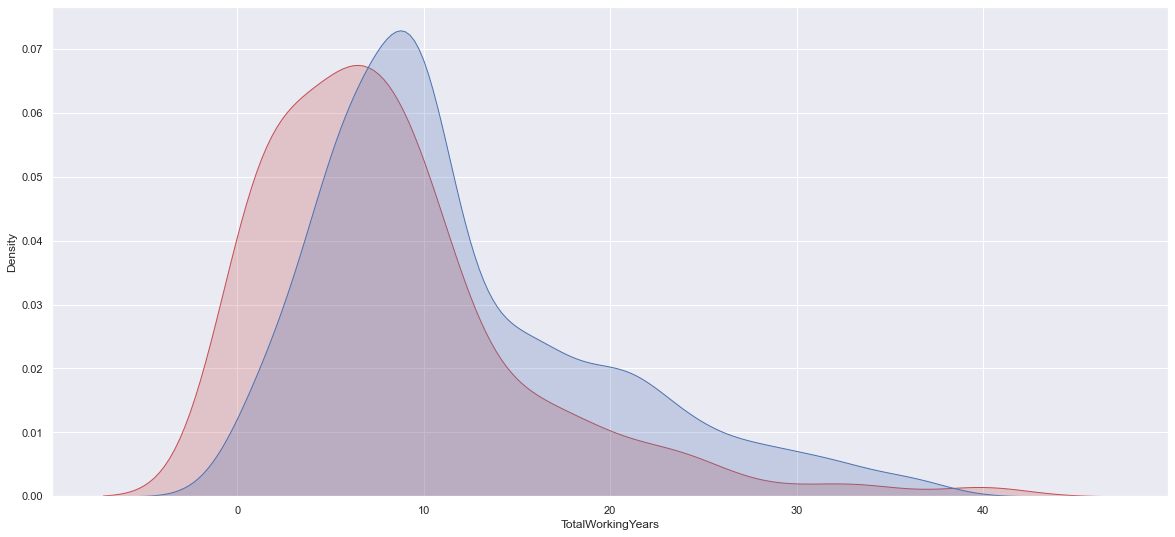

In [23]:
plt.figure(figsize=(20,9))
sns.kdeplot(left_df['TotalWorkingYears'], label='Funcionários que saíram da empresa', shade=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Funcionários que ficaram na empresa', shade=True, color='b')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

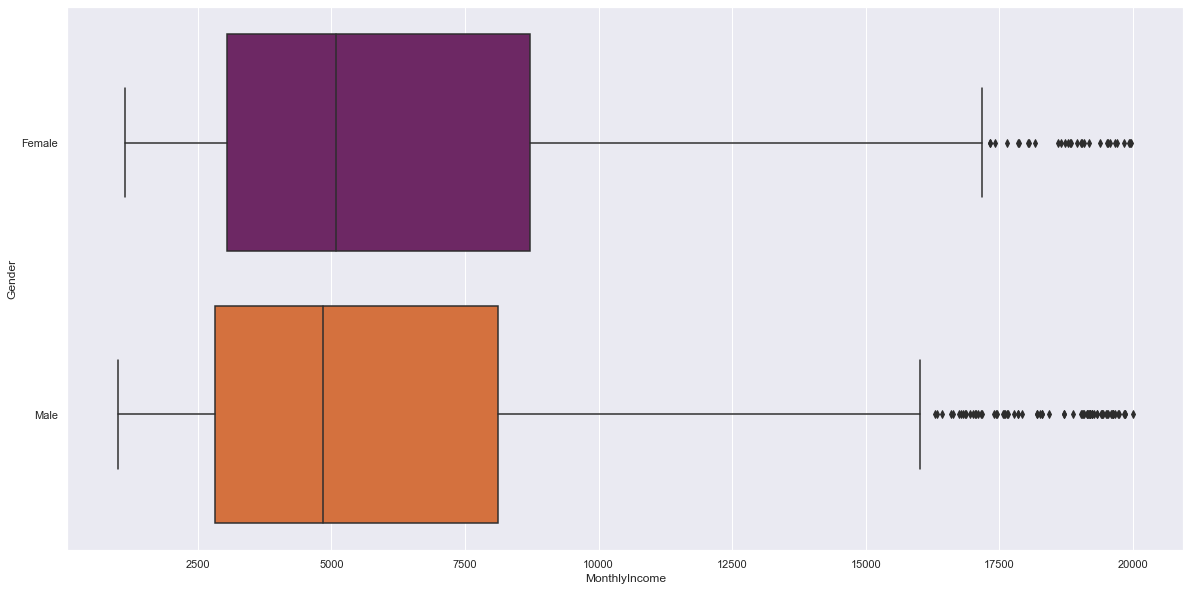

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x='MonthlyIncome', y='Gender', palette='inferno',data=employee_df)

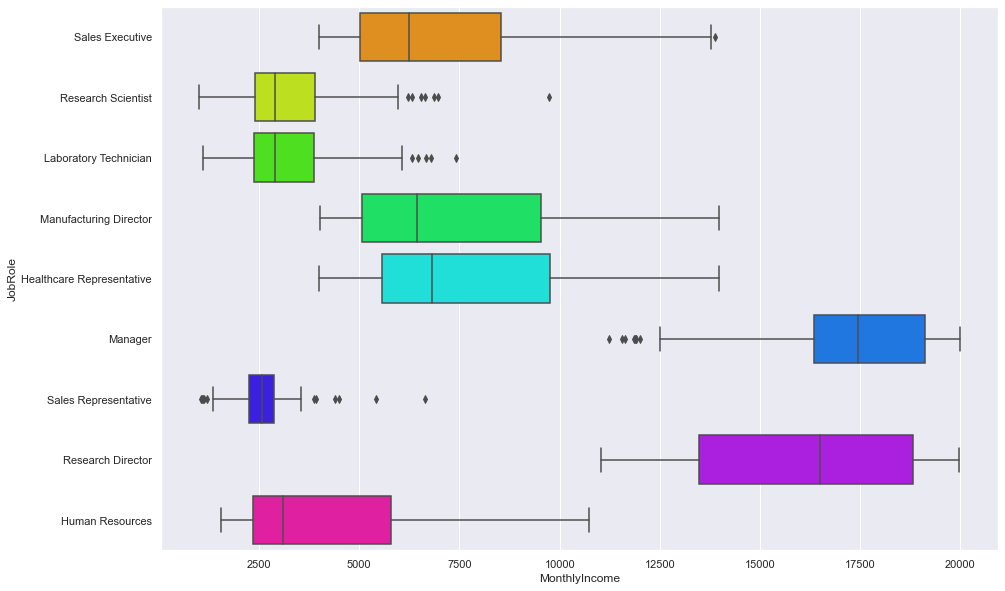

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', palette='hsv',  data=employee_df);

# 4. Pré-processamento de dados

In [26]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [27]:
# Male Female
# 1    0
# 0    1

# Single Married Divorced
# 1      0       0
# 0      1       0
# 0      0       1

onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [28]:
X_cat.shape

(1470, 26)

In [29]:
X_cat = pd.DataFrame(X_cat)

In [30]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
employee_df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [32]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [33]:
# concatenando

X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [34]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [35]:
# deixar na mesma escala, deixar atributos com a mesma importância

scaler = MinMaxScaler()

X = scaler.fit_transform(X_all)

In [36]:
y = employee_df['Attrition']

In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# 5. Aplicação dos modelos de Machine Learning

In [38]:
# divisão base de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
X_train.shape, y_train

((1029, 50),
 963     0
 1317    0
 1172    0
 1104    0
 931     0
        ..
 532     0
 396     0
 338     0
 1369    1
 1160    0
 Name: Attrition, Length: 1029, dtype: int64)

In [40]:
X_test.shape, y_test

((441, 50),
 893     0
 1277    0
 187     0
 314     0
 1464    0
        ..
 863     0
 1057    1
 900     0
 1410    0
 254     0
 Name: Attrition, Length: 441, dtype: int64)

## Regressão logística

In [41]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = logistic.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [44]:
# comparando as previsões com o y_test

accuracy_score(y_test, y_pred)

0.9024943310657596

In [45]:
# confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[360,   9],
       [ 34,  38]], dtype=int64)

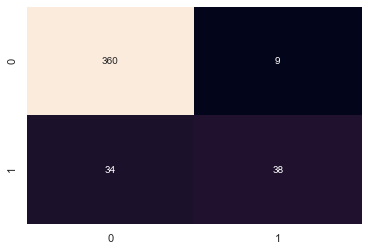

In [46]:
sns.heatmap(cm,annot=True,cbar = False, fmt="d");

In [47]:
precision_score(y_test, y_pred)

0.8085106382978723

In [48]:
recall_score(y_test, y_pred)

0.5277777777777778

In [49]:
f1_score(y_test, y_pred, average='macro')

0.7911494873178628

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       369
           1       0.81      0.53      0.64        72

    accuracy                           0.90       441
   macro avg       0.86      0.75      0.79       441
weighted avg       0.90      0.90      0.89       441



## Random forest

In [51]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred = forest.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.8662131519274376

In [54]:
cm = confusion_matrix(y_test, y_pred)

In [55]:
cm

array([[367,   2],
       [ 57,  15]], dtype=int64)

<AxesSubplot:>

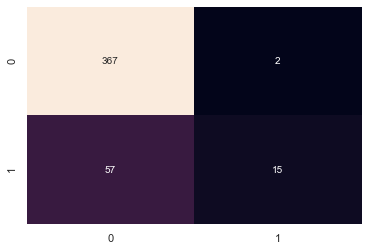

In [56]:
sns.heatmap(cm, annot=True, cbar=False, fmt="d")

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       369
           1       0.88      0.21      0.34        72

    accuracy                           0.87       441
   macro avg       0.87      0.60      0.63       441
weighted avg       0.87      0.87      0.83       441



## Redes neurais artificiais

In [58]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [59]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [60]:
# compilar rede neural

rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 888us/step - loss: 0.5925 - accuracy: 0.7331
Epoch 2/200
33/33 [==============================] - 0s 918us/step - loss: 0.4399 - accuracy: 0.8320
Epoch 3/200
33/33 [==============================] - 0s 935us/step - loss: 0.3754 - accuracy: 0.8598
Epoch 4/200
33/33 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8330
Epoch 5/200
33/33 [==============================] - 0s 967us/step - loss: 0.3897 - accuracy: 0.8375
Epoch 6/200
33/33 [==============================] - ETA: 0s - loss: 0.3002 - accuracy: 0.87 - 0s 999us/step - loss: 0.3472 - accuracy: 0.8401
Epoch 7/200
33/33 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8436
Epoch 8/200
33/33 [==============================] - 0s 941us/step - loss: 0.3474 - accuracy: 0.8544
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8793
Epoch 10/200
33/33 [==============================] - 0

33/33 [==============================] - 0s 975us/step - loss: 0.0348 - accuracy: 0.9911
Epoch 80/200
33/33 [==============================] - 0s 928us/step - loss: 0.0281 - accuracy: 0.9971
Epoch 81/200
33/33 [==============================] - 0s 951us/step - loss: 0.0430 - accuracy: 0.9928
Epoch 82/200
33/33 [==============================] - 0s 878us/step - loss: 0.0344 - accuracy: 0.9936
Epoch 83/200
33/33 [==============================] - 0s 884us/step - loss: 0.0237 - accuracy: 0.9986
Epoch 84/200
33/33 [==============================] - 0s 967us/step - loss: 0.0326 - accuracy: 0.9963
Epoch 85/200
33/33 [==============================] - 0s 872us/step - loss: 0.0270 - accuracy: 0.9946
Epoch 86/200
33/33 [==============================] - 0s 882us/step - loss: 0.0286 - accuracy: 0.9958
Epoch 87/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.9973
Epoch 88/200
33/33 [==============================] - 0s 909us/step - loss: 0.0293 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 160/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 161/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 162/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 163/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 164/200
33/33 [==============================] - 0s 992us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 165/200
33/33 [==============================] - 0s 1ms/step - loss: 9.6781e-04 - accuracy: 1.0000
Epoch 166/200
33/33 [==============================] - 0s 1ms/step - loss: 8.2058e-04 - accuracy: 1.0000
Epoch 167/200
33/33 [==============================] - 0s 984us/step - loss: 8.4099e-04 - accuracy: 1.0000
Epoch 168/200
33/33 [==============================] - 0s 932us/step - loss: 8.1815e-04 -

In [62]:
y_pred = rede_neural.predict(X_test)
y_pred

array([[5.99191530e-11],
       [3.89030361e-13],
       [4.10425693e-09],
       [3.07059586e-02],
       [9.99972939e-01],
       [1.45888829e-10],
       [8.98730159e-02],
       [1.00000000e+00],
       [2.03989634e-06],
       [9.99961615e-01],
       [6.51167920e-09],
       [3.91876767e-07],
       [5.30396633e-08],
       [9.13500786e-04],
       [2.33526350e-07],
       [8.94289672e-01],
       [1.86901072e-09],
       [6.32586598e-01],
       [6.05374873e-02],
       [1.68502331e-03],
       [3.56317413e-17],
       [9.99241456e-06],
       [9.99865651e-01],
       [1.13268058e-17],
       [7.59578461e-06],
       [1.11577712e-10],
       [9.98079419e-01],
       [7.83446085e-05],
       [3.16348596e-05],
       [9.99999762e-01],
       [2.41935253e-04],
       [1.74273628e-05],
       [2.54914966e-07],
       [1.65712833e-02],
       [7.69416220e-05],
       [9.99985218e-01],
       [8.99016857e-04],
       [2.26653412e-07],
       [4.44186687e-09],
       [1.31421477e-01],


In [63]:
# transformação para gerar classe

y_pred = (y_pred >= 0.5)

In [64]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [65]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[342,  27],
       [ 40,  32]], dtype=int64)

<AxesSubplot:>

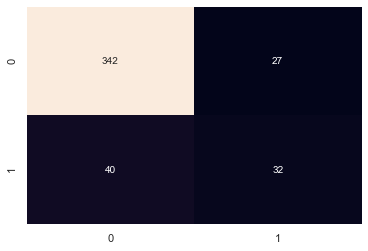

In [66]:
sns.heatmap(cm, annot=True,cbar=False,fmt="d")

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       369
           1       0.54      0.44      0.49        72

    accuracy                           0.85       441
   macro avg       0.72      0.69      0.70       441
weighted avg       0.84      0.85      0.84       441



## Salvar o classificador

In [68]:
with open('variaveis_modelo.pkl', 'wb') as f:
    pickle.dump([scaler, onehotencoder, logistic], f)

In [69]:
with open('variaveis_modelo.pkl', 'rb') as f:
    min_max, encoder, model = pickle.load(f)

In [70]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [71]:
X_novo = employee_df.iloc[0:1]
X_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [72]:
X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [73]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [74]:
X_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [75]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [76]:
X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5


In [77]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis=1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [78]:
X_novo = min_max.transform(X_all_novo)

In [79]:
X_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [80]:
model.predict(X_novo)

array([1], dtype=int64)

In [81]:
model.predict_proba(X_novo)

array([[0.32239875, 0.67760125]])

In [82]:
model.classes_

array([0, 1], dtype=int64)